### Importing libraries

In [84]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

### Reading Data

In [85]:
df = pd.read_csv("new_Base_CDM_balanced_V2.csv")
### df = pd.read_csv("new_Base_CDM_balanced_V2.csv",sep=";")

In [86]:
#Removing first line
df.drop(0,axis=0,inplace = True) 
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat
5,No_Displ,5,62.1,142602,50,CORA,250,No_Feat


In [87]:
#Renaming variables 
New_names = {"Y":"Display","X1":"cor_sales_in_vol","X2":"cor_sales_in_val","X3":"CA_mag","X4":"value",
"X5":"ENSEIGNE","X6":"VenteConv","X7":"Feature"}
df.rename(columns = New_names , inplace = True)

In [88]:
pd.value_counts(df["Display"])
# No_Displ : 13000
# Displ : 12782
# =========> balanced data

No_Displ    13000
Displ       12782
Name: Display, dtype: int64

In [89]:
pd.value_counts(df["Feature"])

No_Feat    19495
Feat        6287
Name: Feature, dtype: int64

In [90]:
df.describe()

,Display,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
count,25782,25782,25782,25782,25782,25782,25782,25782
unique,2,363,8957,323,84,19,1589,2
top,No_Displ,1,7.5,109503,40,CARREFOUR,40,No_Feat
freq,13000,5827,64,255,3314,4629,828,19495


In [91]:
#Checking Missing values
df.isnull().sum()

Display             0
cor_sales_in_vol    0
cor_sales_in_val    0
CA_mag              0
value               0
ENSEIGNE            0
VenteConv           0
Feature             0
dtype: int64

### Test d'indépendance de khi-2

In [92]:
#### Test de chi-deux entre la variable 'Display' et 'ENSEIGNE' 
from scipy.stats import chi2_contingency as chi2_contingency

contingence = df[["Display","ENSEIGNE"]].pivot_table(index="Display",columns="ENSEIGNE",
aggfunc=len).fillna(0).copy().astype(int)

khi2, pval , ddl , contingent_theorique = chi2_contingency(contingence)
#la p-value est très inférieur à 0.05, on considère donc qu'il existe un lien entre la variable 'Display'
# et la varible 'ENSEIGNE'  : il y a dépendance
print(pval)



1.1069799512990182e-154


In [93]:
#### Test de chi-deux entre la variable 'Display' et 'Feature' 

khi2, pval , ddl , contingent_theorique = chi2_contingency(contingence)
contingence = df[["Display","Feature"]].pivot_table(index="Display",columns="Feature",
aggfunc=len).fillna(0).copy().astype(int)

khi2, pval , ddl , contingent_theorique = chi2_contingency(contingence)
#la p-value est égale à 0 , on considère donc qu'il existe un lien entre la variable 'Display'
# et la varible 'Feature'  : il y a dépendance
print(pval)


0.0


In [94]:
quantitative_variables = ['cor_sales_in_vol', 'cor_sales_in_val', 'CA_mag', 'value', 'VenteConv']
for column_name in quantitative_variables :
    df[column_name]=df[column_name].astype(float)

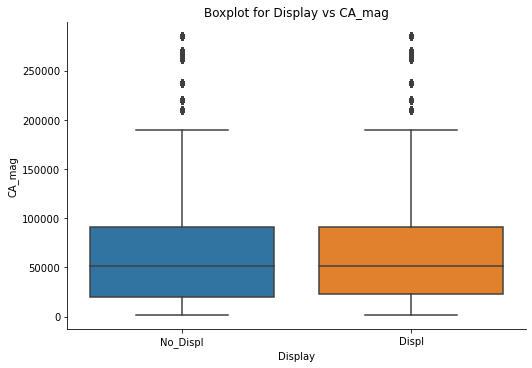

In [95]:
sns.catplot(x="Display", y="CA_mag", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Display vs CA_mag")
plt.show()

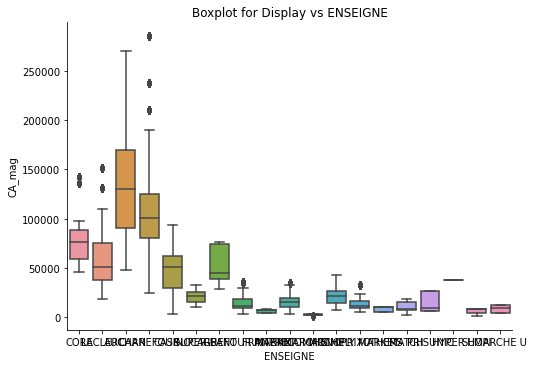

In [97]:
sns.catplot(x="ENSEIGNE", y="CA_mag", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Display vs ENSEIGNE")
plt.show()

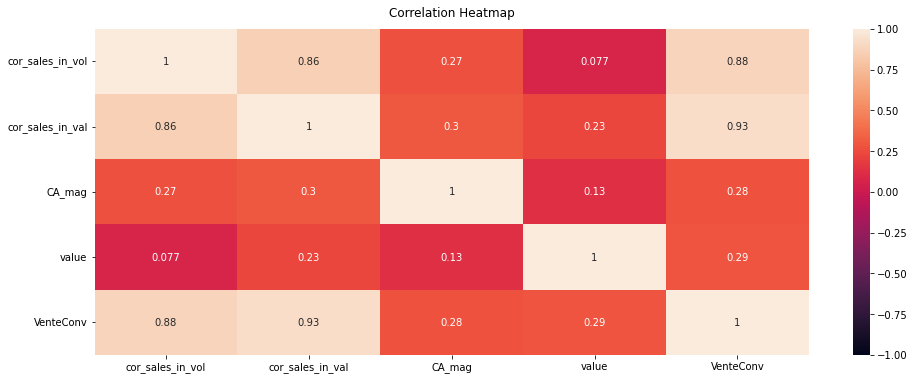

In [98]:
import seaborn as sns
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df[quantitative_variables].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);